In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,mean_squared_error

In [2]:
data = pd.read_csv(r"C:\Users\ADITYA\Downloads\Customer-Churn.csv")

In [3]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
customer_5=data['Dependents']


In [5]:
customer_5

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7043, dtype: object

In [6]:
data.shape

(7043, 21)

In [7]:
data.iloc[:,14]

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040     No
7041     No
7042    Yes
Name: StreamingMovies, Length: 7043, dtype: object

In [8]:
customer_15 = data.loc[:,'StreamingMovies']

In [9]:
customer_15

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040     No
7041     No
7042    Yes
Name: StreamingMovies, Length: 7043, dtype: object

In [10]:
data['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [11]:
senior_male_electronic=data[(data['gender']=='Male') & (data['SeniorCitizen']== 1) & (data['PaymentMethod']=='Electronic check')]

In [12]:
#data of all the male sebior citizens whose Payment Method is Electronic check
senior_male_electronic

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6837,6229-LSCKB,Male,1,No,No,6,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.70,497.6,No
6894,1400-MMYXY,Male,1,Yes,No,3,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.90,334.65,Yes
6914,7142-HVGBG,Male,1,Yes,No,43,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.00,4414.3,Yes
6967,8739-WWKDU,Male,1,No,No,25,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.50,2196.15,Yes


In [13]:
data['MonthlyCharges'].value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1585, dtype: int64

In [16]:
#data of those customers whose tenure is greater than 70 months & their monthly charges is more than 100$
customer_total_tenure = data[(data['tenure'] > 70) | (data['MonthlyCharges'] >100)]

In [17]:
customer_total_tenure

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.4,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No


In [18]:
#data of all the customers whose Contract is of two years,payment method is Mailed check & the value of Churn is 'Yes'.
two_mail_yes = data[(data['Contract']=="Two year")&(data['PaymentMethod']=="Mailed check")&(data['Churn']=='Yes')]

In [19]:
two_mail_yes

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


In [20]:
customer_333 = data.sample(n=333)

In [21]:
customer_333

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4382,2277-VWCNI,Female,1,No,No,4,Yes,Yes,DSL,No,...,No,No,No,No,Month-to-month,No,Mailed check,48.75,179.85,No
3866,3129-AAQOU,Female,0,Yes,Yes,19,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.60,485.9,No
6308,5442-BHQNG,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Electronic check,70.35,139.25,No
2290,7470-MCQTK,Female,0,Yes,No,13,No,No phone service,DSL,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),48.75,633.4,Yes
2649,3027-YNWZU,Female,0,Yes,No,64,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),25.00,1584.8,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,9208-OLGAQ,Female,1,No,No,18,Yes,No,Fiber optic,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,84.95,1443.65,No
270,4385-GZQXV,Female,1,No,No,16,Yes,No,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,94.45,1511.2,Yes
6066,5349-IECLD,Male,0,No,No,2,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,94.95,178.1,Yes
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes


In [22]:
customer_333.shape

(333, 21)

In [23]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [24]:
data['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

# Plotting

In [26]:
x= data['InternetService'].value_counts().keys().to_list()

In [27]:
y=data['InternetService'].value_counts().to_list()

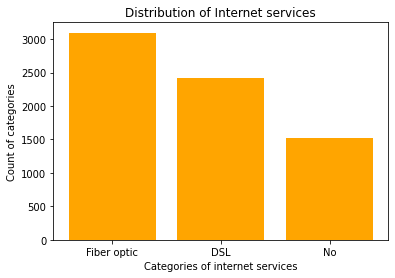

In [28]:
plt.bar(x,y,color="orange")
plt.xlabel("Categories of internet services")
plt.ylabel("Count of categories")
plt.title("Distribution of Internet services")
plt.show()

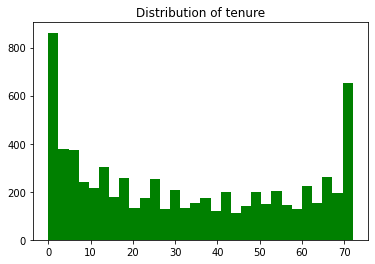

In [29]:
plt.hist(data['tenure'],bins=30,color="green")
plt.title("Distribution of tenure")
plt.show()

In [30]:
x=data['tenure'].head(50)
y=data['MonthlyCharges'].head(50)

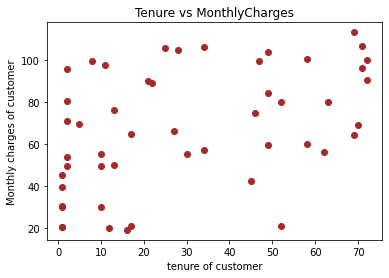

In [31]:
plt.scatter(x,y,color="brown")
plt.xlabel("tenure of customer")
plt.ylabel("Monthly charges of customer")
plt.title("Tenure vs MonthlyCharges")
plt.show()

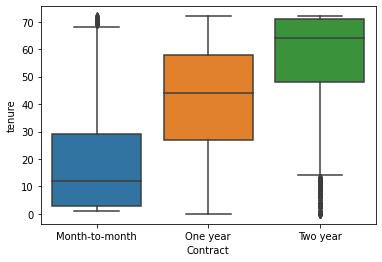

In [32]:
sns.boxplot(x='Contract',y='tenure',data=data)
plt.show()

Linear Regression


In [33]:
linear_x=pd.DataFrame(data['tenure'])

In [34]:
linear_y=pd.DataFrame(data['MonthlyCharges'])

In [35]:
linear_x_train,linear_x_test,linear_y_train,linear_y_test=train_test_split(linear_x,linear_y,train_size=0.70,random_state=0)

In [36]:
l_r=LinearRegression()

In [37]:
l_r.fit(linear_x_train,linear_y_train)

LinearRegression()

In [38]:
d=l_r.predict(linear_x_test)

In [39]:
mse=mean_squared_error(d,linear_y_test)

In [40]:
mse

864.0415701364655

In [41]:
rmse=np.sqrt(mse)

In [42]:
rmse

29.394584027273893

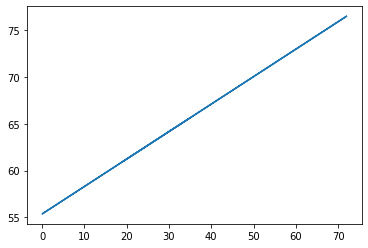

In [43]:
plt.plot(linear_x_test,d)

Logistic Regression


In [44]:
lr_x=pd.DataFrame(data['MonthlyCharges'])
lr_y=pd.DataFrame(data['Churn'])

In [45]:
lr_x

,MonthlyCharges
0,29.85
1,56.95
2,53.85
3,42.30
4,70.70
...,...
7038,84.80
7039,103.20
7040,29.60
7041,74.40


In [46]:
lr_y

,Churn
0,No
1,No
2,Yes
3,No
4,Yes
...,...
7038,No
7039,No
7040,No
7041,Yes


In [47]:
lr_x_train,lr_x_test,lr_y_train,lr_y_test=train_test_split(lr_x,lr_y,test_size=.35,random_state=0)

In [48]:
lr=LogisticRegression()

In [49]:
lr_fit=lr.fit(lr_x_train,lr_y_train)

C:\Users\ADITYA\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [50]:
lr_ypred=lr.predict(lr_x_test)

In [51]:
lr_ypred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [52]:
confusion_matrix(lr_ypred,lr_y_test)

array([[1815,  651],
       [   0,    0]], dtype=int64)

In [53]:
accuracy_score(lr_ypred,lr_y_test)

0.7360097323600974

In [54]:
mlr_x=pd.DataFrame(data.loc[:,["MonthlyCharges","tenure"]])

In [55]:
mlr_y=pd.DataFrame(data['Churn'])

In [56]:
mlr_x_train,mlr_x_test,mlr_y_train,mlr_y_test=train_test_split(mlr_x,mlr_y,test_size=0.2,random_state=0)

In [57]:
ml_r=LogisticRegression()

In [58]:
ml_r.fit(mlr_x_train,mlr_y_train)

C:\Users\ADITYA\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [59]:
mlr_ypred=ml_r.predict(mlr_x_test)

In [60]:
mlr_ypred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [61]:
confusion_matrix(mlr_ypred,mlr_y_test)

array([[934, 212],
       [107, 156]], dtype=int64)

In [62]:
accuracy_score(mlr_ypred,mlr_y_test)

0.7735982966643009

Decision Tree


In [63]:
dx=pd.DataFrame(data['tenure'])
dy=pd.DataFrame(data['Churn'])

In [64]:
dx_train,dx_test,dy_train,dy_test=train_test_split(dx,dy,test_size=0.2,random_state=0)

In [65]:
dt=DecisionTreeClassifier()

In [66]:
dt.fit(dx_train,dy_train)

DecisionTreeClassifier()

In [67]:
d_ypred=dt.predict(dx_test)

In [68]:
d_ypred

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [69]:
confusion_matrix(d_ypred,dy_test)

array([[965, 281],
       [ 76,  87]], dtype=int64)

In [70]:
accuracy_score(d_ypred,dy_test)

0.7466288147622427

Random Forest

In [71]:
rf_x=pd.DataFrame(data.loc[:,["MonthlyCharges","tenure"]])

In [72]:
rf_y=pd.DataFrame(data['Churn'])

In [73]:
rf_x_train,rf_x_test,rf_y_train,rf_y_test=train_test_split(rf_x,rf_y,test_size=0.2,random_state=0)

In [74]:
r_f=RandomForestClassifier().fit(rf_x_train,rf_y_train)

C:\Users\ADITYA\AppData\Local\Temp/ipykernel_4160/17885070.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  r_f=RandomForestClassifier().fit(rf_x_train,rf_y_train)


In [75]:
r_f

RandomForestClassifier()

In [76]:
rf_ypred=r_f.predict(rf_x_test)

In [77]:
rf_ypred

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [78]:
confusion_matrix(rf_ypred,rf_y_test)

array([[881, 221],
       [160, 147]], dtype=int64)

In [79]:
accuracy_score(rf_ypred,rf_y_test)

0.7295954577714692